# Entry 29 notebook - Cumulative gains and lift - Click prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.datasets import fetch_openml
import scikitplot as skplt

## Make dataset and fit model

In [3]:
click_pred = fetch_openml(data_id=1216, as_frame=True)
df_raw = click_pred.data
target = click_pred.target

In [5]:
click_pred.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [11]:
click_pred.frame.head()

,click,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id
0,0,3.0,20711339.0,27500.0,2.0,2.0,2846.0,12631.0,26225.0,1887952.0
1,0,1.0,10398727.0,23808.0,2.0,2.0,14133.0,19101.0,18378.0,7665680.0
2,0,1.0,3827183.0,23792.0,1.0,1.0,5348.0,61.0,77.0,66280.0
3,0,2.0,4427867.0,28622.0,1.0,1.0,62466.0,127249.0,170983.0,0.0
4,0,2.0,1983809.0,11810.0,3.0,2.0,8139.0,37594.0,2339.0,290.0


In [12]:
X = df_raw.copy()
y = target.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=12)
pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9548581758158775

In [13]:
y_scores = cross_val_predict(pipe, X_train, y_train, cv=5, method='predict_proba')

### Cumulative gains chart

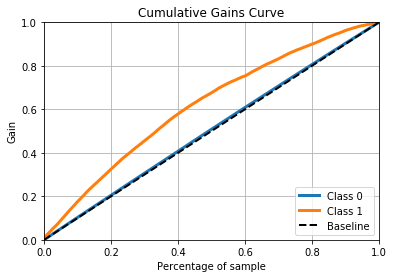

In [14]:
skplt.metrics.plot_cumulative_gain(y_train, y_scores)

### Lift chart

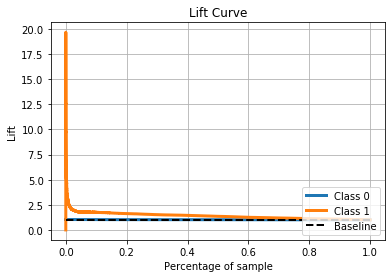

In [15]:
skplt.metrics.plot_lift_curve(y_train, y_scores)

### Kolomogorov-Smirnov (KS) chart

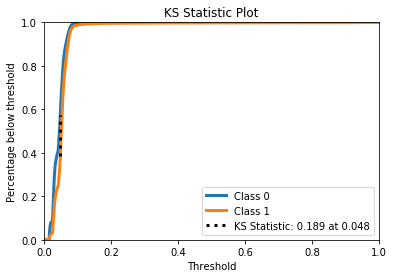

In [16]:
skplt.metrics.plot_ks_statistic(y_train, y_scores)